<a href="https://colab.research.google.com/github/0ginny/TIL/blob/main/240415_Convolutional_neural_network_for_image_classification_ORIGINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional neural network for image classification

## Importing the libraries

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Loading the images

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
%cd /content/gdrive/MyDrive/Colab Notebooks/Vision_AZ

/content/gdrive/MyDrive/Colab Notebooks/Vision_AZ


In [7]:
path = './Datasets/homer_bart_2.zip'
zip_obj = zipfile.ZipFile(file = path, mode = 'r')
zip_obj.extractall('./')
zip_obj.close()

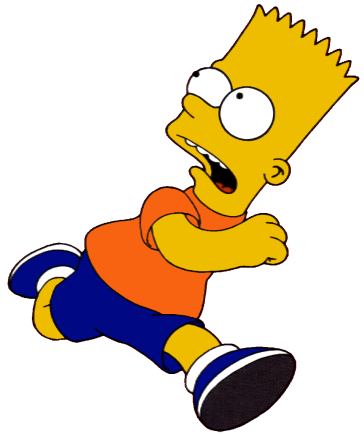

In [8]:
tf.keras.preprocessing.image.load_img('./homer_bart_2/training_set/bart/bart100.bmp')

## Train and test set

In [18]:
training_generator = ImageDataGenerator(rescale = 1./255, # 데이터 정규화 흑백으로
                                        rotation_range = 7,
                                        horizontal_flip = True,
                                        zoom_range = 0.2) # 파라미터는 데이터가 충분하지 않을경우 수정해주면 유용할 수 있음. 이미지를 변경시켜서 새롭게 생성해

In [12]:
train_dataset = training_generator.flow_from_directory('./homer_bart_2/training_set',
                                                       target_size = (64,64) ,
                                                       batch_size = 8,
                                                        class_mode = 'categorical',
                                                       shuffle = True)

Found 215 images belonging to 2 classes.


In [15]:
train_dataset.class_indices

{'bart': 0, 'homer': 1}

In [17]:
test_generator = ImageDataGenerator(rescale = 1./255)

In [19]:
test_dataset = test_generator.flow_from_directory('./homer_bart_2/test_set',
                                                       target_size = (64,64) ,
                                                       batch_size = 1, # 이미지 하나씩 검증
                                                        class_mode = 'categorical',
                                                       shuffle = False) # 검증에는 만드시 False로

Found 54 images belonging to 2 classes.


## Building and training the neural network

In [21]:
network = Sequential()
network.add(Conv2D(filters = 32, # filter num
                   kernel_size = (3,3), # filter size
                   activation = 'relu',
                   input_shape = (64,64,3))) # target size * chanel
network.add(MaxPool2D(pool_size = (2,2)))

network.add(Conv2D(filters = 32,
                   kernel_size = (3,3),
                   activation = 'relu'))
network.add(MaxPool2D(pool_size = (2,2)))

network.add(Conv2D(filters = 32,
                   kernel_size = (3,3),
                   activation = 'relu'))
network.add(MaxPool2D(pool_size = (2,2)))

network.add(Flatten()) # 그저 벡터로 변환
#hidden layer
network.add(Dense(units = 577, activation = 'relu'))
network.add(Dense(units = 577, activation = 'relu'))
# output
network.add(Dense(units = 2, activation = 'softmax')) # output, homor, bart

network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 32)         

In [25]:
network.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [26]:
history = network.fit_generator(train_dataset, epochs = 50)

Epoch 1/50


<ipython-input-26-5f5809592554>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = network.fit_generator(train_dataset, epochs = 50)


27/27 [==============================] - 4s 88ms/step - loss: 0.6594 - accuracy: 0.6186
Epoch 2/50
27/27 [==============================] - 2s 87ms/step - loss: 0.5618 - accuracy: 0.7163
Epoch 3/50
27/27 [==============================] - 3s 113ms/step - loss: 0.4662 - accuracy: 0.8000
Epoch 4/50
27/27 [==============================] - 2s 85ms/step - loss: 0.4266 - accuracy: 0.8186
Epoch 5/50
27/27 [==============================] - 2s 89ms/step - loss: 0.4034 - accuracy: 0.8186
Epoch 6/50
27/27 [==============================] - 2s 89ms/step - loss: 0.3091 - accuracy: 0.8698
Epoch 7/50
27/27 [==============================] - 3s 95ms/step - loss: 0.2969 - accuracy: 0.8837
Epoch 8/50
27/27 [==============================] - 2s 84ms/step - loss: 0.3324 - accuracy: 0.8605
Epoch 9/50
27/27 [==============================] - 2s 87ms/step - loss: 0.2550 - accuracy: 0.8884
Epoch 10/50
27/27 [==============================] - 2s 88ms/step - loss: 0.2360 - accuracy: 0.9116
Epoch 11/50
27/27 [

## Evaluating the neural network

In [27]:
test_dataset.class_indices

{'bart': 0, 'homer': 1}

In [28]:
predictions = network.predict(test_dataset)

54/54 [==============================] - 1s 12ms/step


In [30]:
predictions = np.argmax(predictions, axis = 1)


AxisError: axis 1 is out of bounds for array of dimension 1

In [31]:
predictions

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [32]:
test_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset.classes, predictions)

0.9074074074074074

<Axes: >

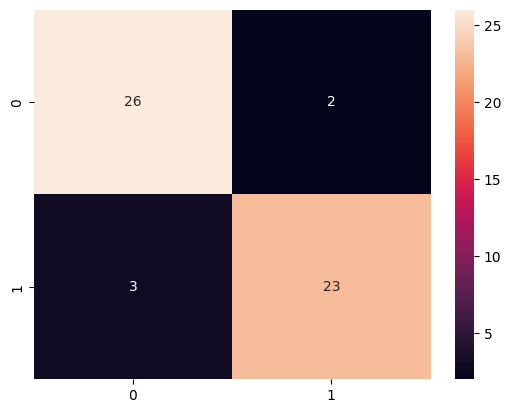

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_dataset.classes, predictions)
sns.heatmap(cm, annot = True)

In [37]:
from sklearn.metrics import classification_report
print(classification_report(test_dataset.classes, predictions))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91        28
           1       0.92      0.88      0.90        26

    accuracy                           0.91        54
   macro avg       0.91      0.91      0.91        54
weighted avg       0.91      0.91      0.91        54



## Saving and loading the model

## Classifying one single image